In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [2]:
dataset=pd.read_csv('Questionnaire.csv')

In [3]:
dataset.head()

,Timestamp,Patient_ID,Date,Class,Age,Gender,Blood Group,BMI,Pulse Rate,on_thyroxine,...,CRP,Creatinine,Vitamin D,Thyroid Ultrasound,thyroid scan (thyroid scintigraphy),Ferritin,Anti HCV,Bilirubin,AFP,Comment
0,9/20/2023 13:15:13,CSCR_001,9/16/2023,Normal,33,M,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
1,9/20/2023 13:53:01,CSCR_002,9/16/2023,Normal,46,F,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Advia Centaur CP
2,9/20/2023 13:55:02,CSCR_003,9/16/2023,Normal,59,M,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
3,9/20/2023 14:01:58,CSCR_004,9/16/2023,Hypo,32,M,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
4,9/20/2023 15:17:09,CSCR_005,9/16/2023,Normal,57,F,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411


In [4]:
dataset.columns

Index(['Timestamp', 'Patient_ID', 'Date', 'Class', 'Age', 'Gender',
       'Blood Group', 'BMI', 'Pulse Rate', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
       'I131_treatment',
       'Have you been experiencing any of these symptoms?(check all that apply)',
       'TSH', 'FT4', 'FT3', 'T4 ', 'T3', 'Anti-TPO Ab',
       'Random Blood Sugar (RBS)', 'WBC', 'RBC', 'Platelet', 'Hb',
       'Total Cholesterol', 'Triglycerides', 'HDL Cholesterol',
       'LDL Cholesterol', 'S.IgE', 'Prolactin', 'LH', 'FSH', 'ALT', 'AST',
       'CRP', 'Creatinine', 'Vitamin D', 'Thyroid Ultrasound',
       'thyroid scan (thyroid scintigraphy)', 'Ferritin', 'Anti HCV',
       'Bilirubin', 'AFP', 'Comment'],
      dtype='object')

In [5]:
dataset.shape 

(2087, 46)

# Check No of Null values


In [6]:
dataset.isnull().sum() 

Timestamp                                                                     0
Patient_ID                                                                    0
Date                                                                          0
Class                                                                         0
Age                                                                           0
Gender                                                                        0
Blood Group                                                                 498
BMI                                                                        2086
Pulse Rate                                                                 2087
on_thyroxine                                                                538
query_on_thyroxine                                                          539
on_antithyroid_medication                                                   367
thyroid_surgery                         

In [7]:
sns.set_style('whitegrid')
#plt.figure(figsize=(10,15))

<AxesSubplot:>

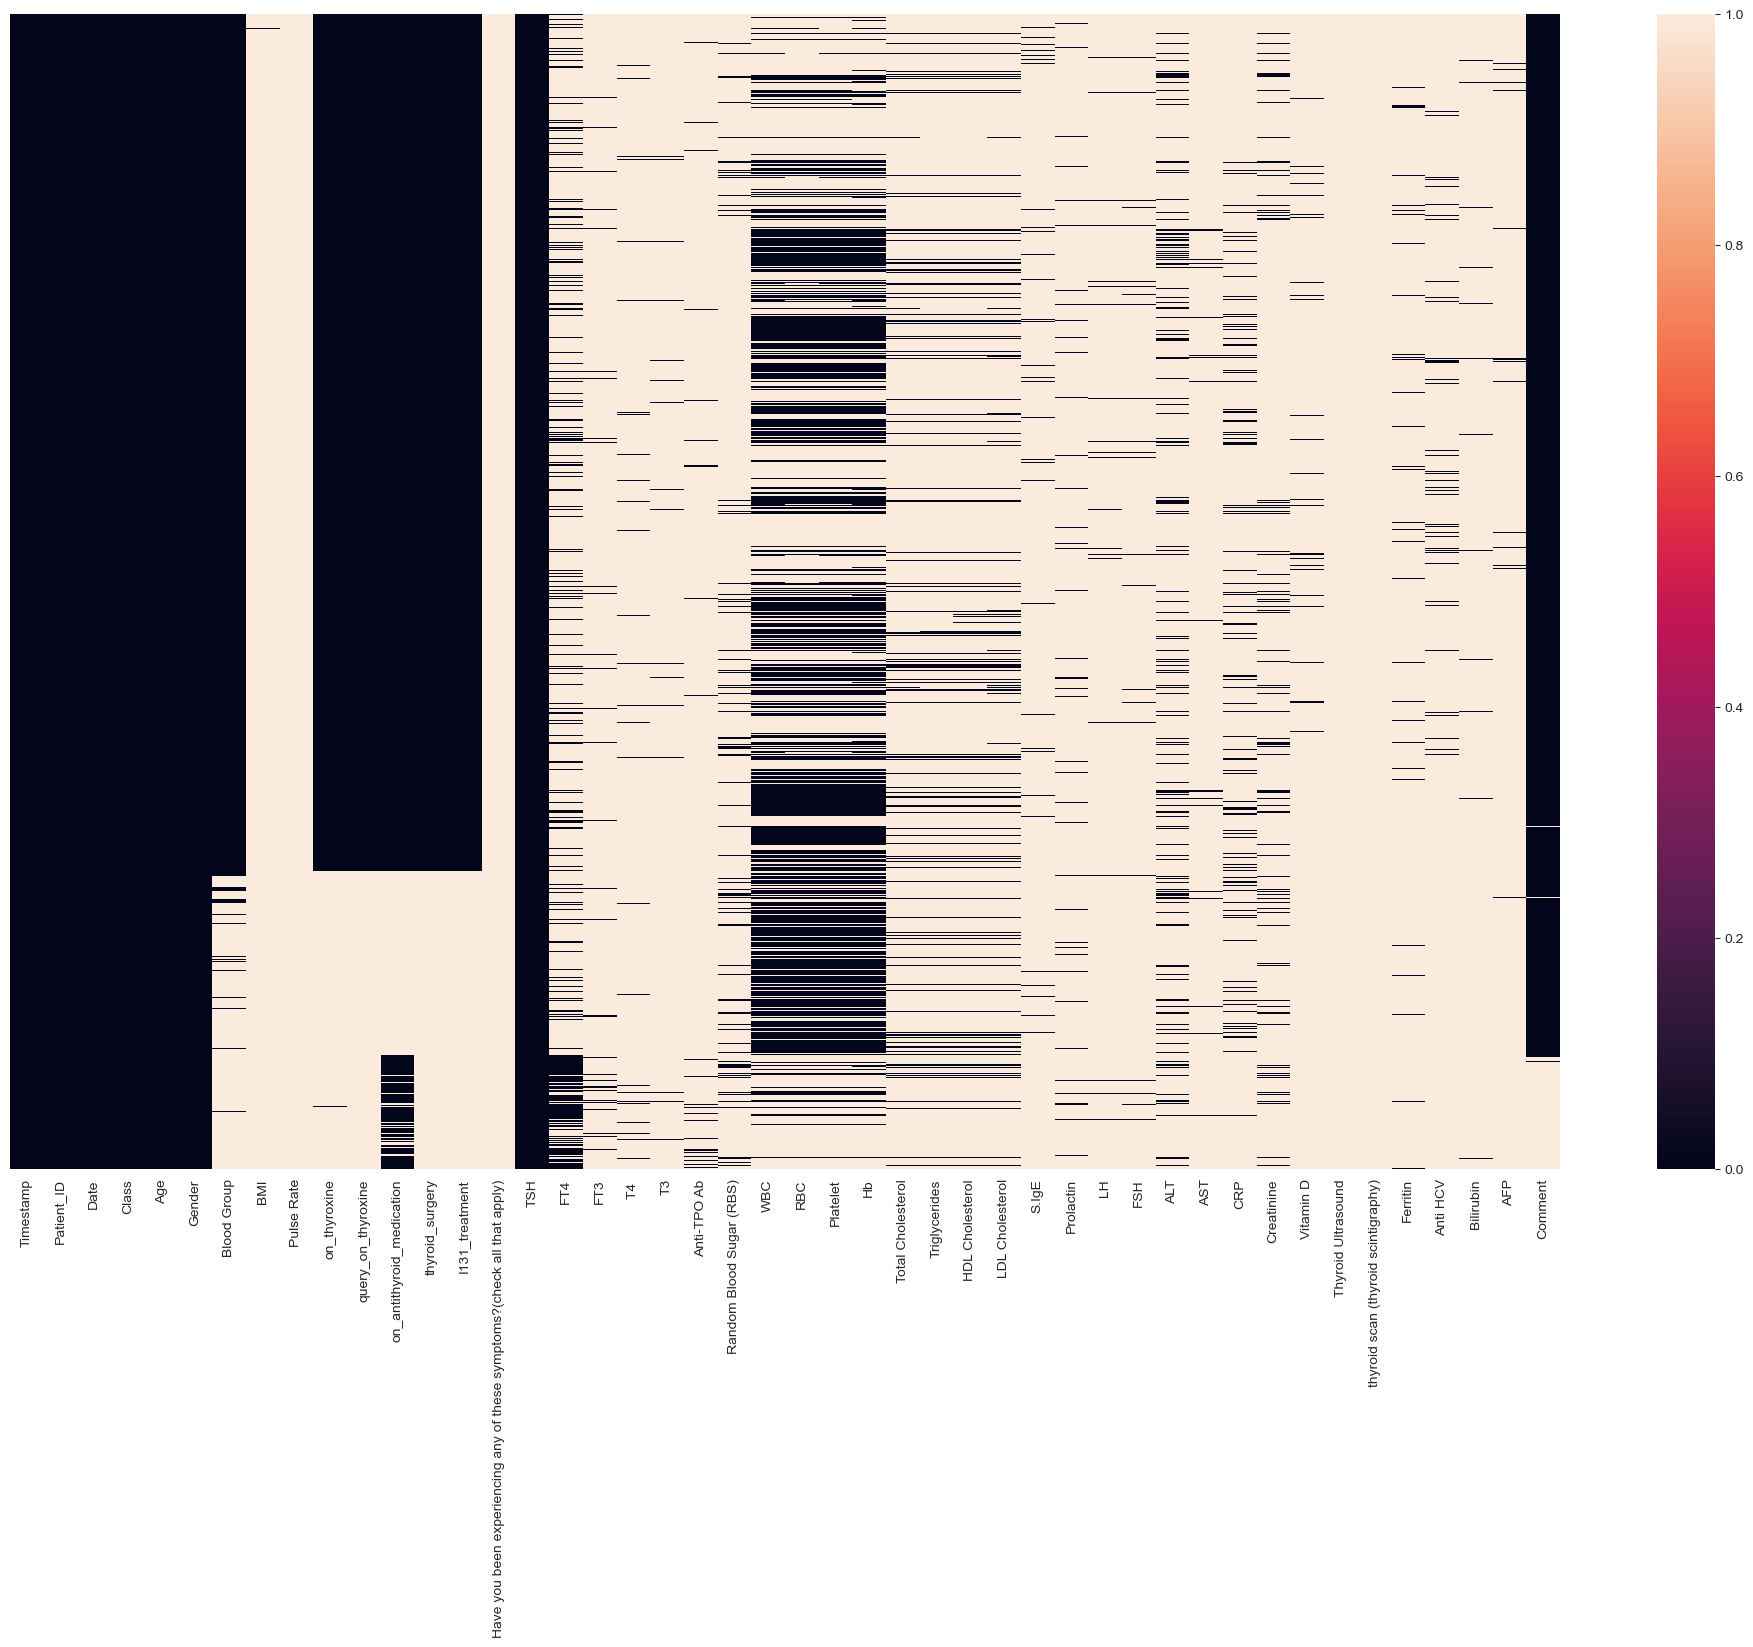

In [8]:
plt.figure(figsize=(25, 15))
sns.heatmap(dataset.isnull(), yticklabels=False)  

# Preprocess blood group using mode

In [9]:
mode_blood_group = dataset['Blood Group'].mode()[0]  

In [10]:
mode_blood_group 

'O+'

<AxesSubplot:xlabel='Blood Group', ylabel='count'>

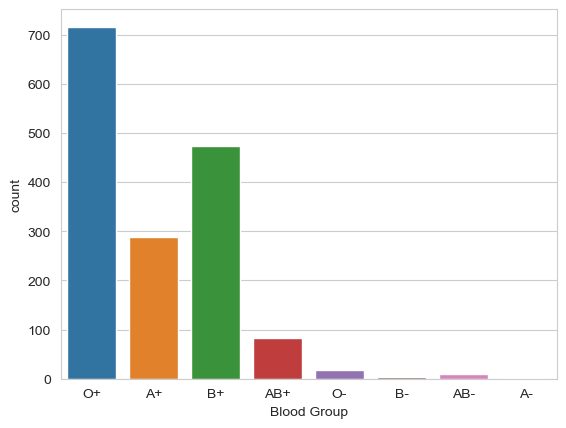

In [11]:
sns.countplot(x='Blood Group',data=dataset)

In [12]:
dataset['Blood Group'].fillna(mode_blood_group,inplace=True)   

In [13]:
dataset.isnull().sum()

Timestamp                                                                     0
Patient_ID                                                                    0
Date                                                                          0
Class                                                                         0
Age                                                                           0
Gender                                                                        0
Blood Group                                                                   0
BMI                                                                        2086
Pulse Rate                                                                 2087
on_thyroxine                                                                538
query_on_thyroxine                                                          539
on_antithyroid_medication                                                   367
thyroid_surgery                         

<AxesSubplot:xlabel='Blood Group', ylabel='count'>

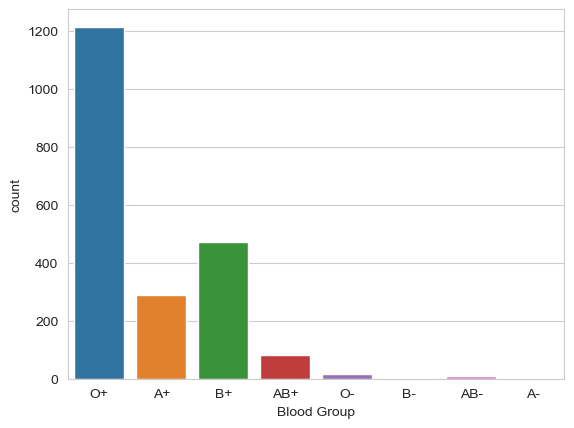

In [14]:
sns.countplot(x='Blood Group',data=dataset)

# Processing On Thyroxine data

<AxesSubplot:xlabel='on_thyroxine', ylabel='count'>

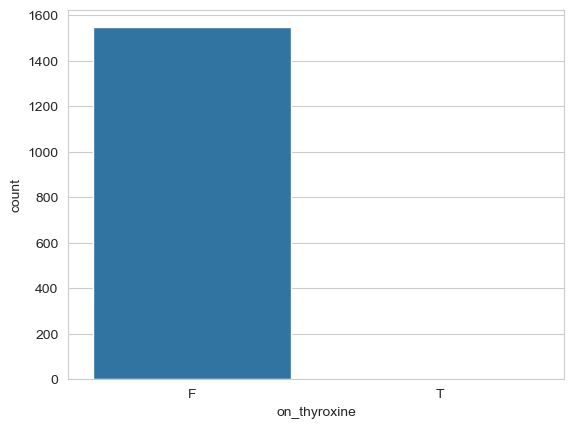

In [15]:
sns.countplot(x='on_thyroxine',data=dataset) 

In [16]:
mode_on_thyroxine=dataset['on_thyroxine'].mode()[0]

In [17]:
mode_on_thyroxine

'F'

In [18]:
dataset['on_thyroxine'].fillna(mode_on_thyroxine,inplace=True)

In [19]:
dataset['on_thyroxine'].isnull().sum()

0

# Processing query_on_thyroxine

In [20]:
dataset['query_on_thyroxine'].value_counts() 

F    1548
Name: query_on_thyroxine, dtype: int64

In [21]:
dataset['query_on_thyroxine'].fillna(dataset['query_on_thyroxine'].mode()[0],inplace=True)

In [22]:
dataset['query_on_thyroxine'].isnull().sum() 

0

#  Processing  on_antithyroid_medication

In [23]:
dataset['on_antithyroid_medication'].value_counts() 

F    1560
T     160
Name: on_antithyroid_medication, dtype: int64

In [24]:
# imputition by probabilistic approach
probability_of_f = 1560 / (1560 + 160)

# Generate random values based on the probabilities
random_values = np.random.choice(['F', 'T'], size=dataset['on_antithyroid_medication'].isnull().sum(), p=[probability_of_f, 1 - probability_of_f])

# Replace missing values with the generated random values
dataset.loc[dataset['on_antithyroid_medication'].isnull(), 'on_antithyroid_medication'] = random_values


In [25]:
dataset['on_antithyroid_medication'].value_counts() 

F    1898
T     189
Name: on_antithyroid_medication, dtype: int64

# Processing thyroid_surgery

In [26]:
dataset['thyroid_surgery'].value_counts() 

F    1548
Name: thyroid_surgery, dtype: int64

In [27]:
dataset['thyroid_surgery'].fillna('F', inplace=True)

In [28]:
dataset['thyroid_surgery'].value_counts()

F    2087
Name: thyroid_surgery, dtype: int64

# Processing I131_treatment

In [29]:
dataset['I131_treatment'].value_counts()

F    1548
Name: I131_treatment, dtype: int64

In [30]:
dataset['I131_treatment'].fillna('F', inplace=True) 

In [31]:
dataset['I131_treatment'].value_counts()

F    2087
Name: I131_treatment, dtype: int64

# Processing wbc

In [32]:
dataset['WBC'].isnull().sum() 

1091

# Convert Scientific Notation to Numeric Values 

In [33]:
import re 
def convert_scientific_notation(value):
    match = re.match(r'([\d.]+)x10\^([\d-]+)', str(value))
    if match:
        base, exponent = map(float, match.groups())
        return base * 10**exponent
    else:
        return float('nan')

# Apply the function to the 'WBC' column
dataset['WBC'] = dataset['WBC'].apply(convert_scientific_notation) 

<AxesSubplot:xlabel='Gender', ylabel='WBC'>

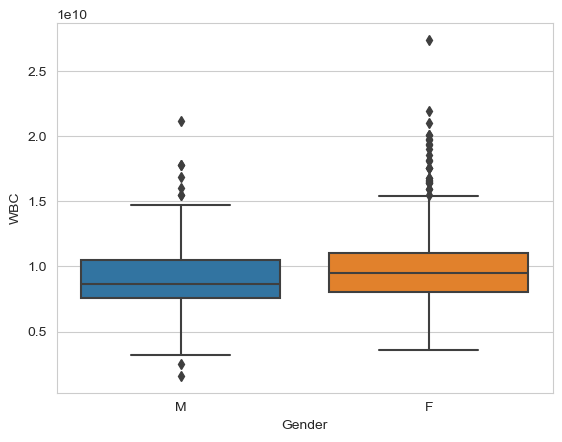

In [34]:
sns.boxplot(x='Gender', y='WBC', data=dataset) 

In [35]:
mean_wbc_male = dataset.loc[dataset['Gender'] == 'M', 'WBC'].mean()

print("Mean WBC for Gender 'M':", mean_wbc_male)

Mean WBC for Gender 'M': 9095626811.594202


In [36]:
mean_wbc_female = dataset.loc[dataset['Gender'] == 'F', 'WBC'].mean()

print("Mean WBC for Gender 'F':", mean_wbc_female) 

Mean WBC for Gender 'F': 9844441260.744986


# use predictive model linear regression to predict wbc hue is Gender

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'dataset' is your DataFrame
# Create a new DataFrame with non-null values for 'WBC' and 'Gender'
df_train = dataset[['WBC', 'Gender']].dropna()

# Separate the features (X) and target variable (y)
X = pd.get_dummies(df_train[['Gender']], drop_first=True)  # Convert categorical variable to numerical using one-hot encoding
y = df_train['WBC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'WBC' values for rows with missing values based on 'Gender'
missing_values = dataset['WBC'].isnull()
X_missing = pd.get_dummies(dataset.loc[missing_values, ['Gender']], drop_first=True)
predicted_wbc = model.predict(X_missing)

# Fill missing values in the original DataFrame
dataset.loc[missing_values, 'WBC'] = predicted_wbc


In [38]:
dataset['WBC'].isnull().sum() 

0

<AxesSubplot:>

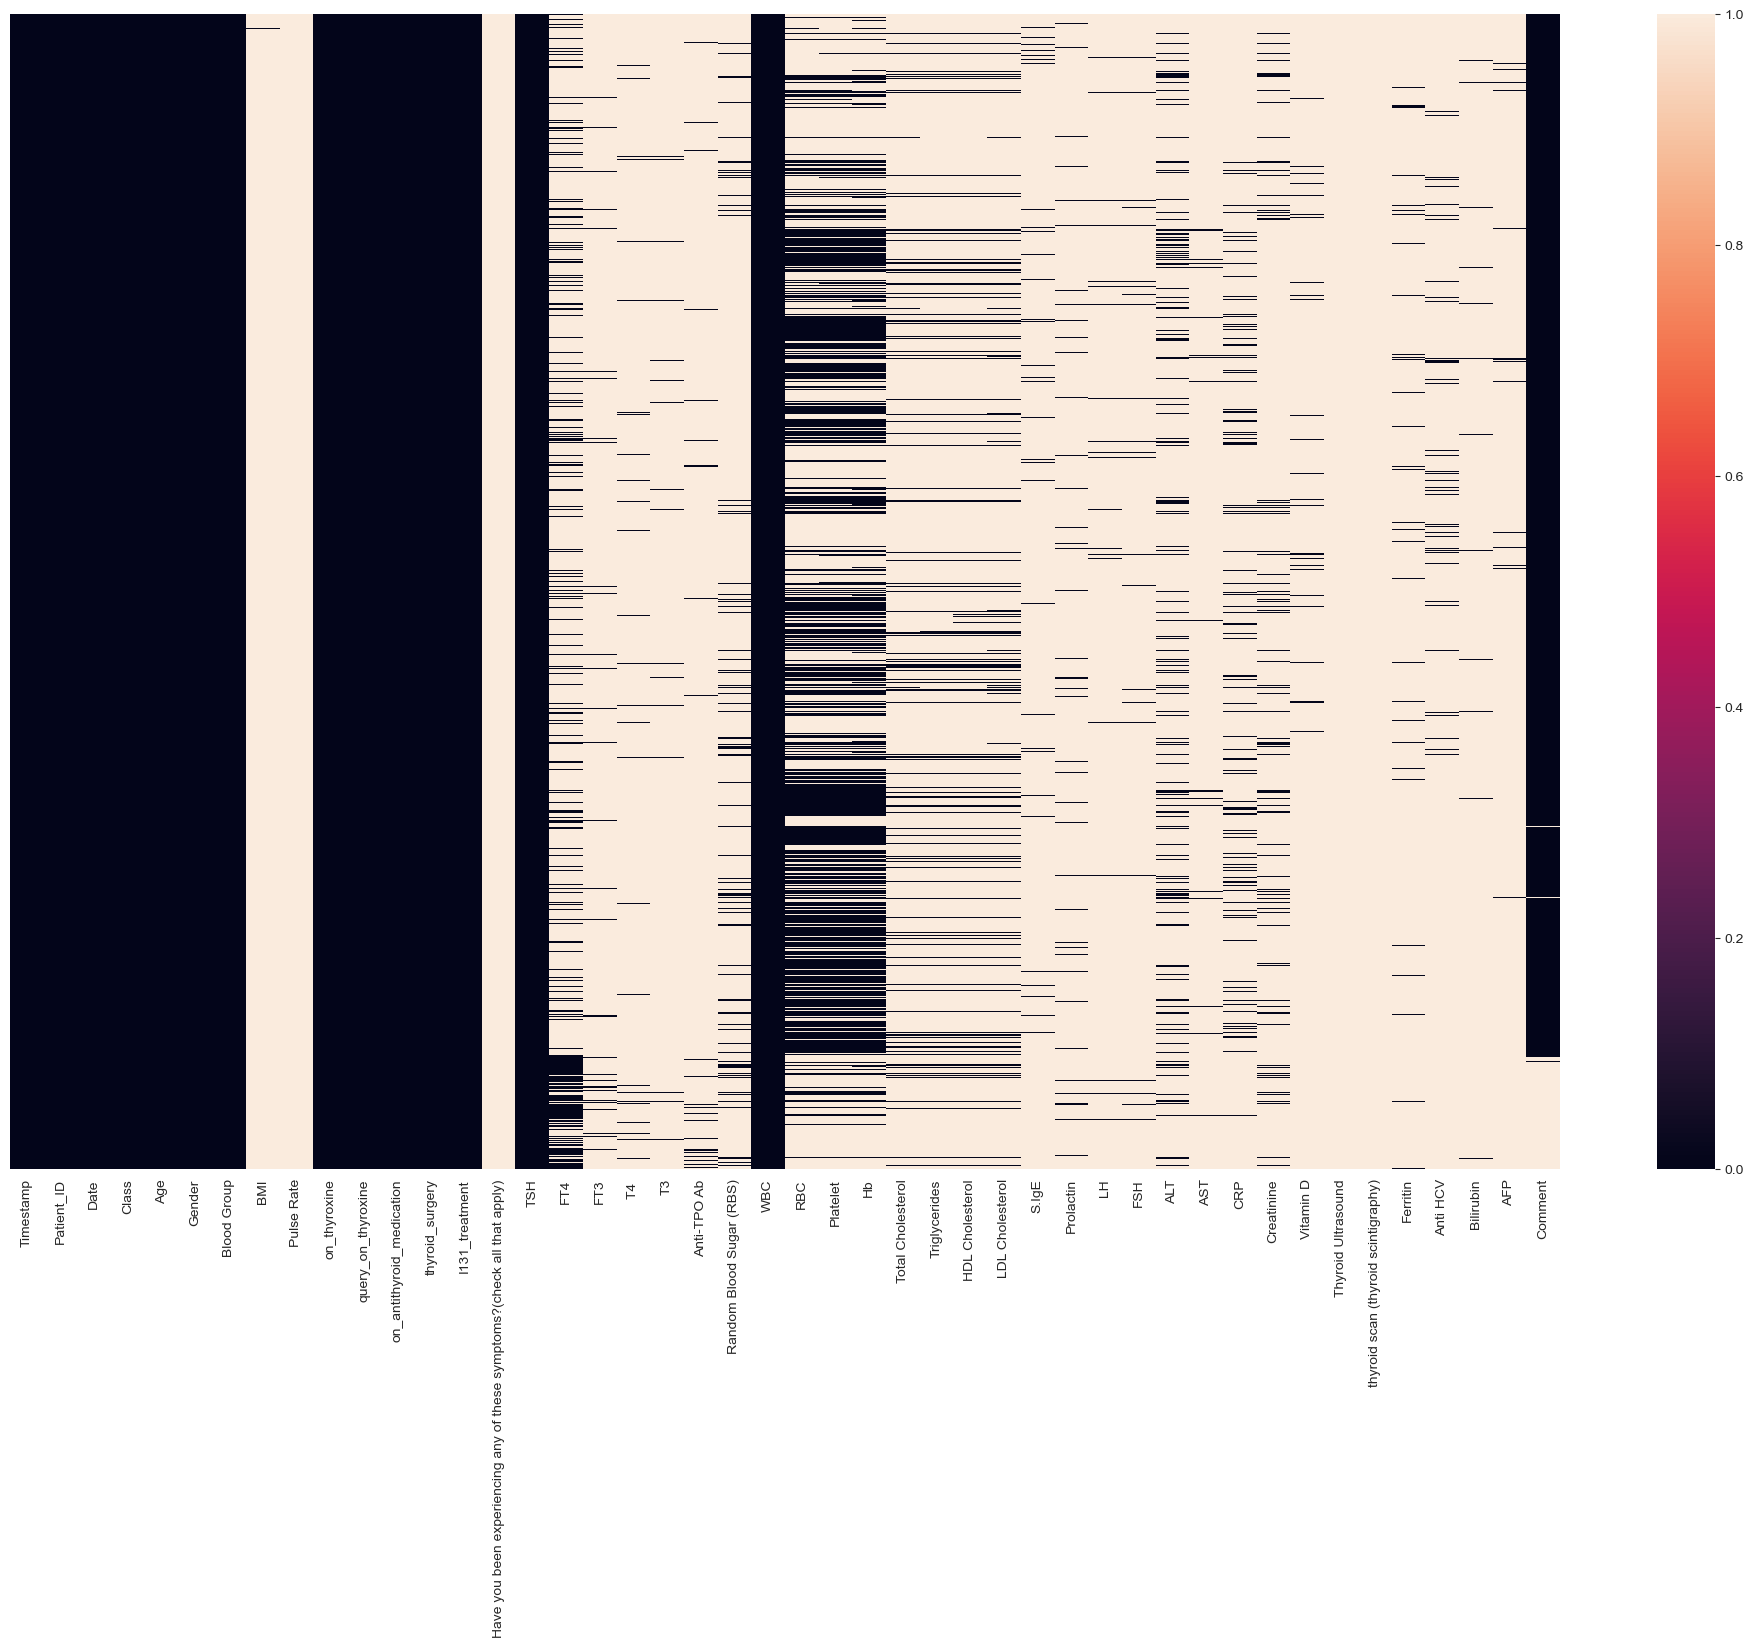

In [39]:
plt.figure(figsize=(25, 15))
sns.heatmap(dataset.isnull(), yticklabels=False) 

# Processing RBC

In [40]:
dataset['RBC'].isnull().sum()  

1103

In [41]:
dataset['RBC'] = dataset['RBC'].apply(convert_scientific_notation)  

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'dataset' is your DataFrame
# Create a new DataFrame with non-null values for 'WBC' and 'Gender'
df_train = dataset[['RBC', 'Gender']].dropna()

# Separate the features (X) and target variable (y)
X = pd.get_dummies(df_train[['Gender']], drop_first=True)  # Convert categorical variable to numerical using one-hot encoding
y = df_train['RBC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'WBC' values for rows with missing values based on 'Gender'
missing_values = dataset['RBC'].isnull()
X_missing = pd.get_dummies(dataset.loc[missing_values, ['Gender']], drop_first=True)
predicted_rbc = model.predict(X_missing)

# Fill missing values in the original DataFrame
dataset.loc[missing_values, 'RBC'] = predicted_rbc


In [43]:
dataset['RBC'].isnull().sum()  

0

# Processing Platelete

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming X contains RBC and WBC columns
X = dataset[['RBC', 'WBC']]
y = dataset['Platelet']

model = LinearRegression()
imputer = SimpleImputer()

# Fit the imputer
imputer.fit(X, y)

# Predict missing Platelet values
dataset['Platelet'] = imputer.transform(dataset[['RBC', 'WBC']]) 


In [45]:
dataset['Platelet'].isnull().sum()   

0

# Level Encoding for Gender

In [46]:
dataset['Gender'].replace({'M':1,'F':0},inplace=True)

In [47]:
dataset.head(2) 

,Timestamp,Patient_ID,Date,Class,Age,Gender,Blood Group,BMI,Pulse Rate,on_thyroxine,...,CRP,Creatinine,Vitamin D,Thyroid Ultrasound,thyroid scan (thyroid scintigraphy),Ferritin,Anti HCV,Bilirubin,AFP,Comment
0,9/20/2023 13:15:13,CSCR_001,9/16/2023,Normal,33,1,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
1,9/20/2023 13:53:01,CSCR_002,9/16/2023,Normal,46,0,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Advia Centaur CP


# Preprocessing Age

In [48]:
def convert_age_to_fraction_of_year(age):
    if 'M' in age:
        return 1 
    elif 'D' in age:
        return 0 
    else:
        return age

# Apply the function to the 'Age' column
dataset['Age'] = dataset['Age'].astype(str).apply(convert_age_to_fraction_of_year) 


In [49]:
dataset['Age'].head()

0    33
1    46
2    59
3    32
4    57
Name: Age, dtype: object

In [50]:
dataset['Age']=dataset['Age'].astype(int)

In [51]:
dataset['Age'].dtype

dtype('int32')

# Preprocessing Hb

In [52]:
dataset['Hb'].isnull().sum()

1075

In [53]:
dataset['Hb'].dtype   

dtype('O')

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

X = dataset[['RBC','Age','Gender']]
y = dataset['Hb']

model = LinearRegression()
imputer = SimpleImputer()

# Fit the imputer
imputer.fit(X, y)

# Predict missing Platelet values
dataset['Hb'] = imputer.transform(dataset[['RBC','Age','Gender']]) 

In [55]:
dataset['Hb'].isnull().sum() 

0

# Processing Total Cholesterol

In [56]:
mean_cholesterol = dataset['Total Cholesterol'].mean()
dataset['Total Cholesterol'].fillna(mean_cholesterol, inplace=True)

In [57]:
dataset['Total Cholesterol'].isnull().sum()

0

In [58]:
dataset.isnull().sum() 

Timestamp                                                                     0
Patient_ID                                                                    0
Date                                                                          0
Class                                                                         0
Age                                                                           0
Gender                                                                        0
Blood Group                                                                   0
BMI                                                                        2086
Pulse Rate                                                                 2087
on_thyroxine                                                                  0
query_on_thyroxine                                                            0
on_antithyroid_medication                                                     0
thyroid_surgery                         

# Processing Others

In [59]:
mean_Triglycerides = dataset['Triglycerides'].mean()
dataset['Triglycerides'].fillna(mean_Triglycerides, inplace=True)
mean_HDL_Cholesterol = dataset['HDL Cholesterol'].mean()
dataset['HDL Cholesterol'].fillna(mean_HDL_Cholesterol, inplace=True)
mean_LDL_Cholesterol = dataset['LDL Cholesterol'].mean()
dataset['LDL Cholesterol'].fillna(mean_LDL_Cholesterol, inplace=True) 
mean_ALT = dataset['ALT'].mean()
dataset['ALT'].fillna(mean_ALT, inplace=True) 



# Dropping other all features

In [60]:
for col_name in dataset.columns:
    if(dataset[col_name].isnull().sum()>0):
        dataset.drop(col_name,axis=1,inplace=True)

In [61]:
dataset.drop(['Timestamp','Patient_ID','Date'],axis=1,inplace=True)

In [62]:
dataset.isnull().sum()

Class                        0
Age                          0
Gender                       0
Blood Group                  0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
I131_treatment               0
TSH                          0
WBC                          0
RBC                          0
Platelet                     0
Hb                           0
Total Cholesterol            0
Triglycerides                0
HDL Cholesterol              0
LDL Cholesterol              0
ALT                          0
dtype: int64

<AxesSubplot:>

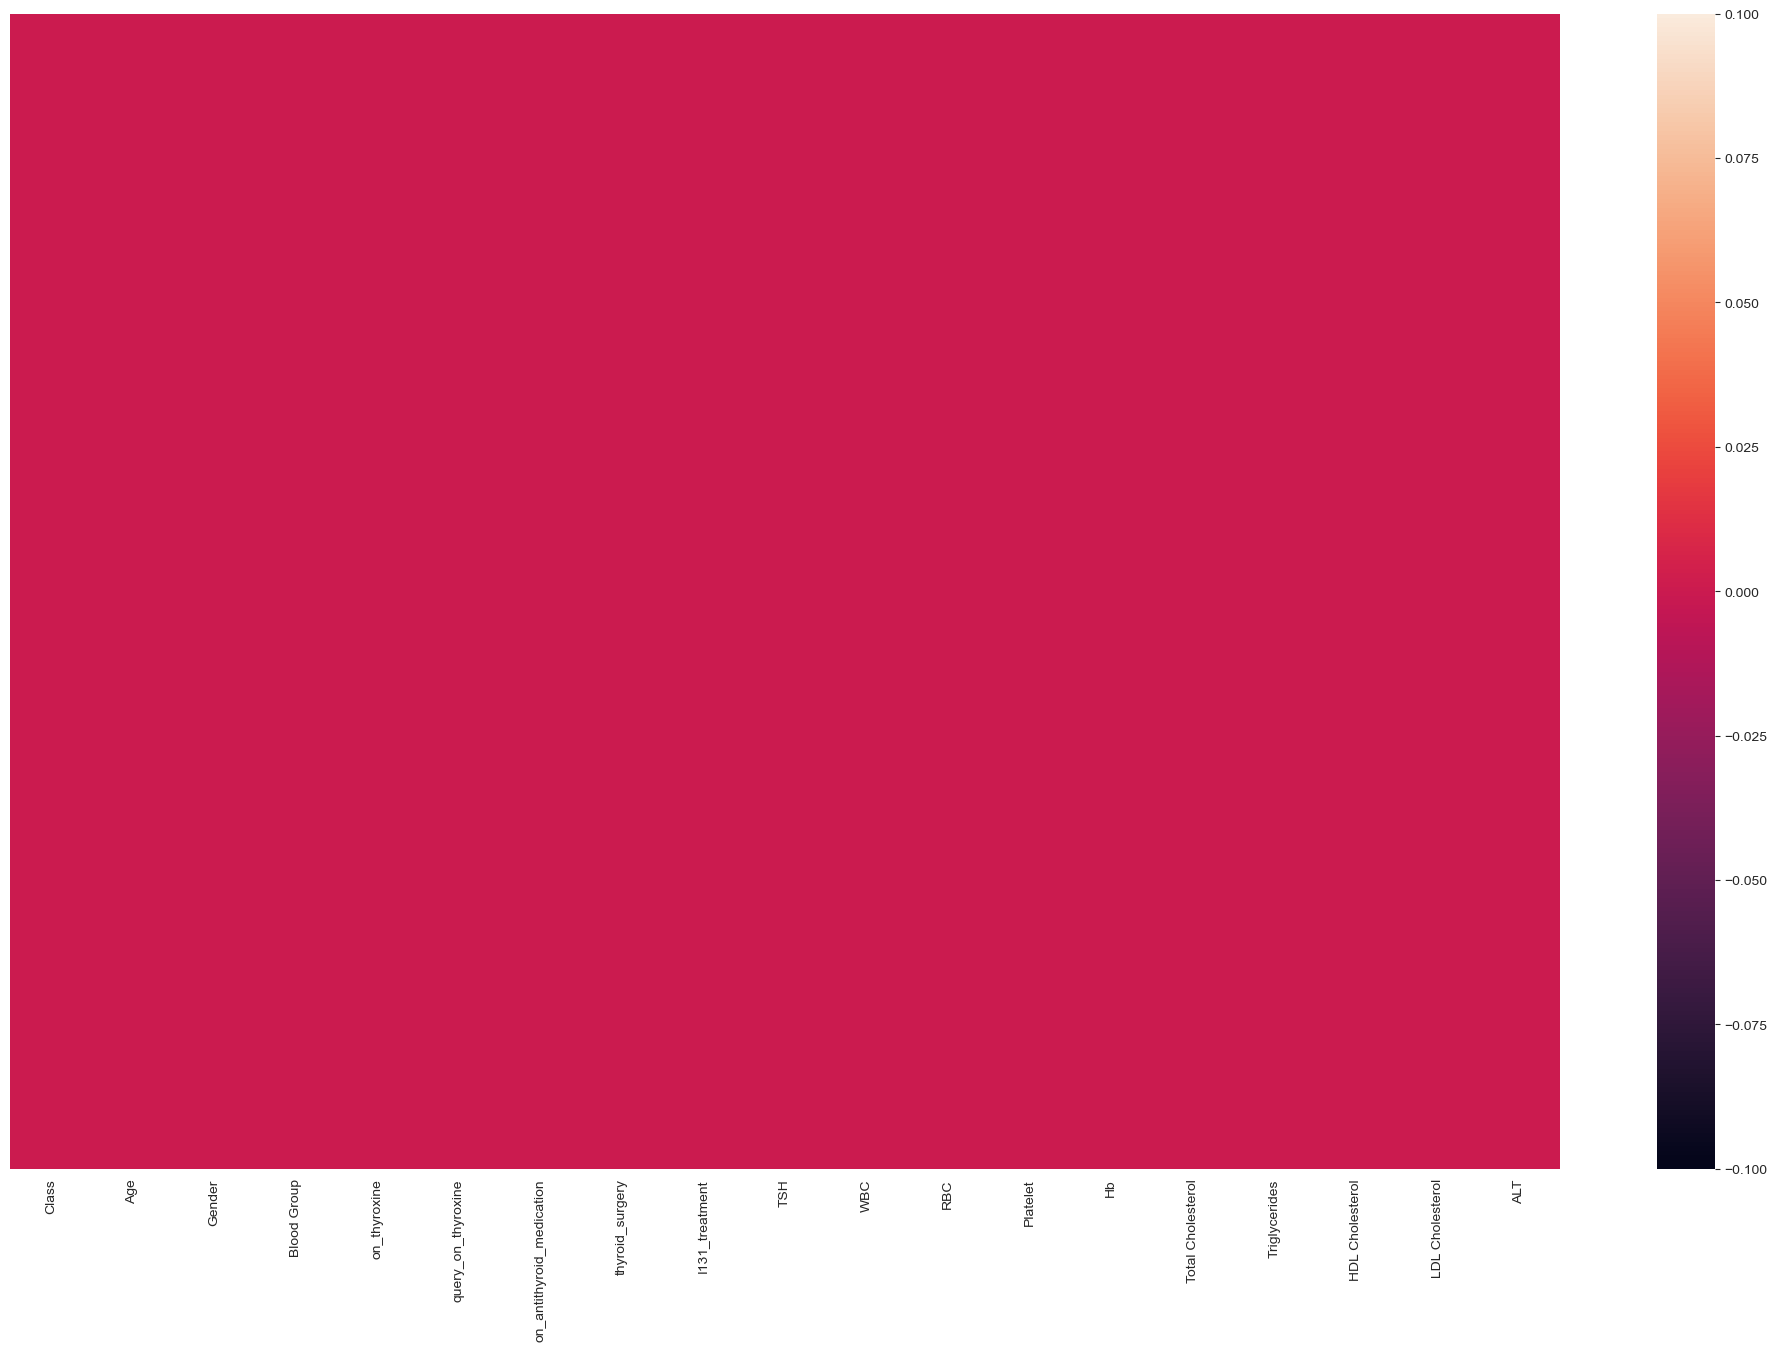

In [63]:
plt.figure(figsize=(25, 15))
sns.heatmap(dataset.isnull(), yticklabels=False) 

# Neumerical Preprocessing is Done

# Here start categorical Processing 

In [64]:
dataset.dtypes

Class                         object
Age                            int32
Gender                         int64
Blood Group                   object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
I131_treatment                object
TSH                          float64
WBC                          float64
RBC                          float64
Platelet                     float64
Hb                           float64
Total Cholesterol            float64
Triglycerides                float64
HDL Cholesterol              float64
LDL Cholesterol              float64
ALT                          float64
dtype: object

In [65]:
dataset['Blood Group'].unique()

array(['O+', 'A+', 'B+', 'AB+', 'O-', 'B-', 'AB-', 'A-'], dtype=object)

In [66]:
# Apply one-hot encoding to the 'Blood Group' column
blood_group_encoded = pd.get_dummies(dataset['Blood Group'], prefix='BloodGroup')

# Concatenate the encoded columns with the original DataFrame
dataset= pd.concat([dataset, blood_group_encoded], axis=1)

In [67]:
dataset.head()

,Class,Age,Gender,Blood Group,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,I131_treatment,TSH,...,LDL Cholesterol,ALT,BloodGroup_A+,BloodGroup_A-,BloodGroup_AB+,BloodGroup_AB-,BloodGroup_B+,BloodGroup_B-,BloodGroup_O+,BloodGroup_O-
0,Normal,33,1,O+,F,F,F,F,F,2.323,...,116.547863,35.192037,0,0,0,0,0,0,1,0
1,Normal,46,0,O+,F,F,F,F,F,1.173,...,116.547863,35.192037,0,0,0,0,0,0,1,0
2,Normal,59,1,O+,F,F,F,F,F,2.520,...,116.547863,35.192037,0,0,0,0,0,0,1,0
3,Hypo,32,1,O+,F,F,F,F,F,7.710,...,116.547863,35.192037,0,0,0,0,0,0,1,0
4,Normal,57,0,O+,F,F,F,F,F,4.340,...,116.547863,35.192037,0,0,0,0,0,0,1,0


In [68]:
dataset.drop('Blood Group',axis=1,inplace=True)

In [69]:
dataset.columns

Index(['Class', 'Age', 'Gender', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'I131_treatment', 'TSH',
       'WBC', 'RBC', 'Platelet', 'Hb', 'Total Cholesterol', 'Triglycerides',
       'HDL Cholesterol', 'LDL Cholesterol', 'ALT', 'BloodGroup_A+',
       'BloodGroup_A-', 'BloodGroup_AB+', 'BloodGroup_AB-', 'BloodGroup_B+',
       'BloodGroup_B-', 'BloodGroup_O+', 'BloodGroup_O-'],
      dtype='object')

In [70]:
dataset['on_thyroxine'].unique()

array(['F', 'T'], dtype=object)

In [71]:
dataset['on_thyroxine'].replace({'F':0,'T':1},inplace=True)

In [72]:
dataset['on_antithyroid_medication'].replace({'F':0,'T':1},inplace=True) 
dataset['thyroid_surgery'].replace({'F':0,'T':1},inplace=True)
dataset['I131_treatment'].replace({'F':0,'T':1},inplace=True) 
dataset['query_on_thyroxine'].replace({'F':0,'T':1},inplace=True) 

In [73]:
dataset.dtypes

Class                         object
Age                            int32
Gender                         int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
I131_treatment                 int64
TSH                          float64
WBC                          float64
RBC                          float64
Platelet                     float64
Hb                           float64
Total Cholesterol            float64
Triglycerides                float64
HDL Cholesterol              float64
LDL Cholesterol              float64
ALT                          float64
BloodGroup_A+                  uint8
BloodGroup_A-                  uint8
BloodGroup_AB+                 uint8
BloodGroup_AB-                 uint8
BloodGroup_B+                  uint8
BloodGroup_B-                  uint8
BloodGroup_O+                  uint8
BloodGroup_O-                  uint8
dtype: object

In [74]:
dataset['Age'].unique()

array([ 33,  46,  59,  32,  57,  35,  19,  52,  43,  48,  27,  65,  67,
        34,  38,  26,  50,  24,  25,  18,   0,  42,  53,  15,  37,  17,
        28,  80,  44,  22,  40,  30,  20,  47,  21,   5,  49,  41,  60,
        29,  39,  45,  11,   9,  63,  31,  70,  51,  75,  55,  23,  54,
        56,  58,  62,  85,  36,  64,  78,  10,   7,  72,  66,  68,  12,
        13,  69,  16,   1,   8,   3,  77,  79,  90,   4,  61,  73,  14,
        71,  86, 100,  74,  87,  76,  95,   6,  81,   2,  84,  82])

# Apply RandomForestClassifier Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Assuming 'class' is the target column, and other columns are features
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [77]:
y_pred

array(['Normal', 'Hypo', 'Normal', 'Normal', 'Normal', 'Normal', 'Hyper',
       'Normal', 'Normal', 'Normal', 'Hyper', 'Normal', 'Normal',
       'Normal', 'Hypo', 'Hypo', 'Hypo', 'Normal', 'Hyper', 'Hyper',
       'Hypo', 'Normal', 'Hyper', 'Normal', 'Hypo', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Hyper', 'Normal', 'Hyper', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Hypo', 'Normal',
       'Hyper', 'Hyper', 'Hyper', 'Hyper', 'Hyper', 'Hypo', 'Hyper',
       'Normal', 'Hypo', 'Normal', 'Normal', 'Normal', 'Hypo', 'Normal',
       'Normal', 'Hypo', 'Hyper', 'Normal', 'Normal', 'Hypo', 'Hypo',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Hyper', 'Hypo',
       'Normal', 'Normal', 'Normal', 'Hypo', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Hypo', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Hyper', 'Hypo', 'Normal',
       'Normal', 'Normal', 'Hypo', 'Normal', 'Normal', 'Nor

In [84]:
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred)) 

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       Hyper       0.99      0.99      0.99       103
        Hypo       0.95      0.97      0.96       131
      Normal       0.99      0.98      0.98       393

    accuracy                           0.98       627
   macro avg       0.98      0.98      0.98       627
weighted avg       0.98      0.98      0.98       627



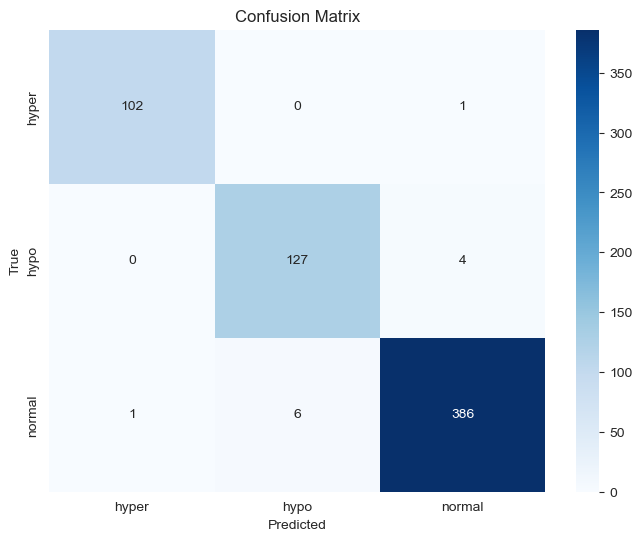

In [86]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['hyper', 'hypo', 'normal'], yticklabels=['hyper', 'hypo', 'normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()